<a href="https://colab.research.google.com/github/Hyeonji1234/IPcolab/blob/main/ch04_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


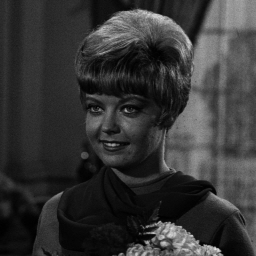

In [51]:
img = cv2.imread('/content/gdrive/My Drive/digital/Images/girl.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

In [52]:
outimg = np.zeros(gimg1.shape, dtype='uint8')

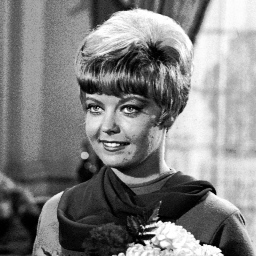

In [53]:
outimg =cv2.equalizeHist(gimg1)
cv2_imshow(outimg)

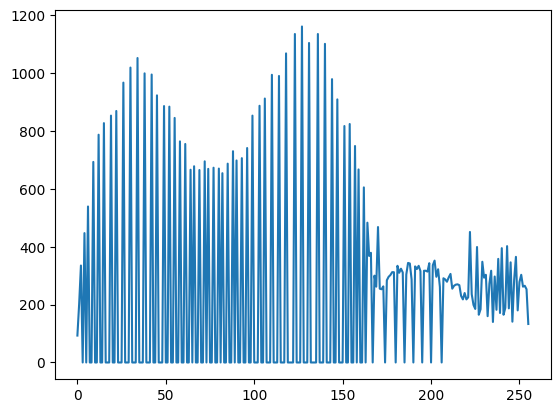

In [40]:
hist = cv2.calcHist([outimg], [0], None, [256], [0, 256])
plt.plot(hist)

In [54]:
myHist = np.zeros((256,1), dtype=np.int32)

히스토그램 만들기

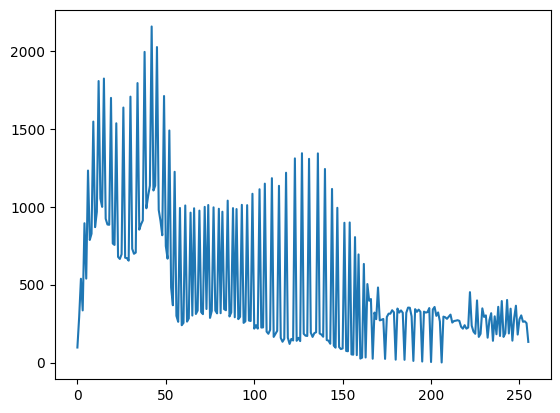

In [58]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    myHist[outimg[h,w]] += 1

plt.plot(myHist)

In [18]:
cumulHist = np.zeros((256,1), dtype=np.int32)

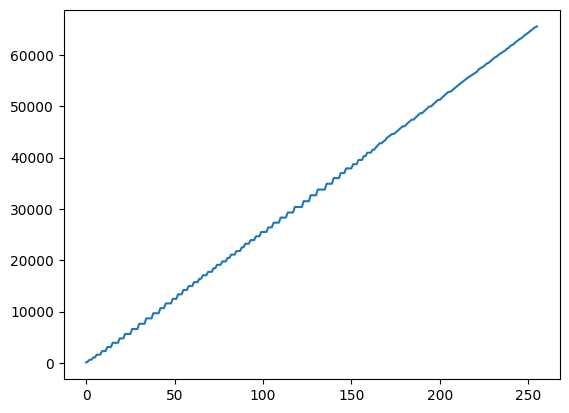

In [19]:
cumulHist[0] = myHist[0]
for i in range(1,256):
  cumulHist[i] = cumulHist[i-1] + myHist[i]

plt.plot(cumulHist)

히스토그램 평활화

In [59]:
equalHist = np.zeros((256,1), dtype=np.int32)

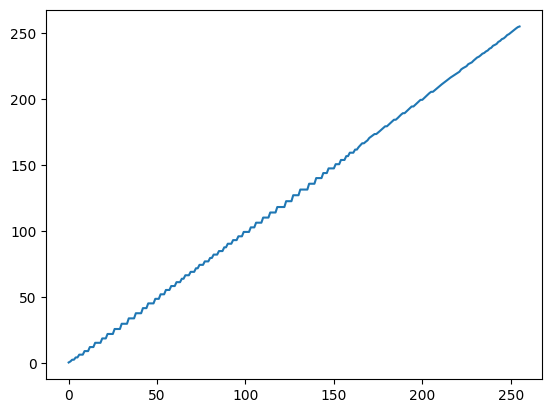

In [60]:
numOfPixel = gimg1.shape[0] * gimg1.shape[1]
equalHist = cumulHist / numOfPixel
equalHist = equalHist * 255

plt.plot(equalHist)

/tmp/ipython-input-1700918746.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outimg[h,w] = equalHist[outimg[h,w]]


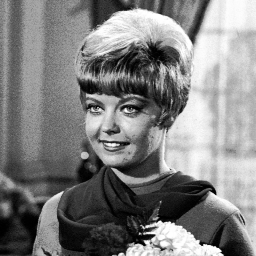

In [61]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    outimg[h,w] = equalHist[outimg[h,w]]

cv2_imshow(outimg)